In [1]:
!mamba install bs4==4.10.0 -y
!pip install lxml==4.6.4
!mamba install html5lib==1.1 -y
# !pip install requests==2.26.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/linux-64       [<=>                 ] (00m:00s) 
pkgs/main/linux-64     

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
url = "https://www.myfootballfacts.com/world-football/world-football-league/worldleagueszambia/"

In [4]:
data = requests.get(url).text

In [5]:
soup = BeautifulSoup(data, "html.parser")

In [6]:
#soup.prettify

In [7]:
tables = soup.find_all('table')
len(tables)

3

In [8]:
# tables
# <th class="dtr0 dtc0" data-priority="0">Year</th>
#  <th class="dtr0 dtc1" data-priority="0">Zambia Champions</th>

In [9]:
for index, table in enumerate(tables):
    if ("Zambia Champions" in str(table)):
        table_index = index
print(table_index)

0


In [10]:
#tables[table_index]

In [29]:
champions = pd.DataFrame(columns=['Year','Team'])

In [45]:
for row in tables[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if(col!= []):
        year = col[0].text
        team = col[1].text
        champions = champions.append({'Year':year, 'Team':team}, ignore_index=True)
        
champions

,Year,Team
0,1962,Roan United
1,1963,Mufulira Wanderers
2,1964,City of Lusaka
3,1965,Mufulira Wanderers
4,1966,Mufulira Wanderers
...,...,...
172,2016,Zanaco
173,2017,ZESCO United
174,2018,ZESCO United
175,2019,ZESCO United


In [31]:
champions.shape

(59, 2)

In [32]:
champions['Team'] = champions['Team'].str.lstrip()


In [40]:
champions['Team']
champions.nunique()

Year    59
Team    12
dtype: int64

In [34]:
df = champions.groupby('Team')['Year'].count()

Text(0.5, 1.0, 'FAZ Champions from 1962 - 2020')

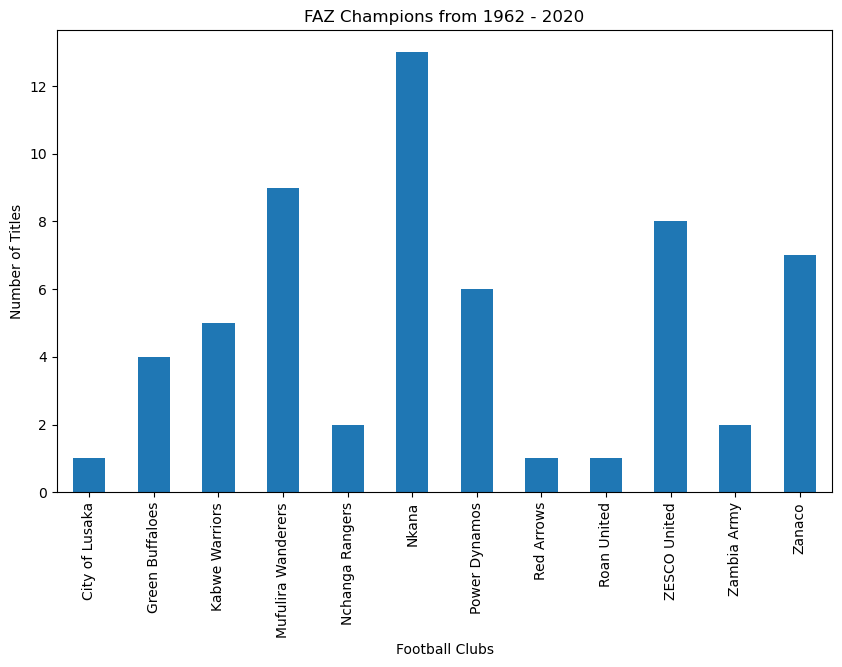

In [47]:
import matplotlib.pyplot as plt

# step 2: plot data
df.plot(kind='bar', figsize=(10, 6))

plt.xlabel("Football Clubs")
plt.ylabel("Number of Titles")
plt.title("FAZ Champions from 1962 - 2020")
# plt.xlabel('Year') # add to x-label to the plot
# plt.ylabel('Number of immigrants') # add y-label to the plot
# plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

# plt.show()